# **Sentiment analysis**

**Sentiment analysis**, also known as opinion mining, is a natural language processing (NLP) technique that identifies the emotional tone embedded within text. This methodology is widely used by organizations to evaluate and categorize public opinions regarding products, services, or concepts. It leverages data mining, machine learning, and artificial intelligence to analyze textual data for sentiment and subjective information.

Sentiment analysis systems enable organizations to derive meaningful insights from unstructured and unorganized text originating from various online sources, such as emails, blog posts, customer support tickets, web chats, social media platforms, forums, and user comments. These systems automate data processing using rule-based, automated, or hybrid methodologies. Rule-based approaches rely on predefined lexicon-based rules to perform sentiment classification, while automated systems utilize machine learning algorithms to infer sentiment from training data. Hybrid systems combine both rule-based and automated methods to enhance performance. Beyond determining sentiment, opinion mining can extract additional information, including polarity (the degree of positivity or negativity), subjects, and opinion holders. Moreover, sentiment analysis can be conducted at various granularities, including document, paragraph, sentence, and sub-sentence levels.



## **Types of Sentiment Analysis**

Sentiment analysis can be categorized into several types based on the level of granularity and the focus of the analysis:

* **Fine-Grained Sentiment Analysis**: This approach provides a detailed breakdown of sentiment polarity, typically on a scale from very positive to very negative. It mirrors the granularity of rating systems, such as a 5-star scale, offering precise insights into opinion strength.

* **Emotion Detection**: Unlike traditional polarity-focused methods, emotion detection identifies specific emotions within the text. Examples include happiness, frustration, shock, anger, and sadness, enabling a deeper understanding of emotional context.

* **Intent-Based Analysis**: This type of analysis extends beyond opinion to recognize the underlying actions or intentions within a text. For instance, a comment expressing frustration about replacing a battery may indicate a need for assistance, prompting customer service intervention to address the issue.

* **Aspect-Based Analysis**: Aspect-based sentiment analysis focuses on identifying sentiment tied to specific components or attributes of a subject. For example, a product review might mention dissatisfaction with battery life rather than the product as a whole. In such cases, the system attributes the negative sentiment specifically to the battery life aspect.

These specialized types of sentiment analysis allow for nuanced and actionable insights, tailored to different analytical needs and use cases.

**Import required libraries** for this Python project for Twitter sentiment analysis of hatred speech recognition.

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import model_selection, preprocessing, linear_model, metrics
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn import ensemble
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_auc_score, roc_curve
from xgboost import XGBClassifier


import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from textblob import Word
nltk.download('wordnet')

from termcolor import colored
from warnings import filterwarnings
filterwarnings('ignore')

from sklearn import set_config
set_config(print_changed_only = False)

print(colored("\nLIBRARIES WERE SUCCESFULLY IMPORTED...", color = "green", attrs = ["dark", "bold"]))


LIBRARIES WERE SUCCESFULLY IMPORTED...


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Dataset of Twitter hatred speech is avilable in the colab folder as train.csv and test.csv

### **Read the dataset files**

In [7]:
# Load the train and test datasets
try:
    train_set = pd.read_csv('/content/train.csv')
    test_set  = pd.read_csv('/content/test.csv')
    print("Datasets loaded successfully.")
    # Now you can work with train_df and test_df
    # Example: print the first 5 rows of the training data
    print(train_set.head())
except FileNotFoundError:
    print("Error: One or both of the CSV files were not found in /content/. Please ensure they are uploaded correctly.")
except pd.errors.ParserError:
    print("Error: Could not parse the CSV files. Please check their format.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

Datasets loaded successfully.
   id  label                                              tweet
0   1      0   @user when a father is dysfunctional and is s...
1   2      0  @user @user thanks for #lyft credit i can't us...
2   3      0                                bihday your majesty
3   4      0  #model   i love u take with u all the time in ...
4   5      0             factsguide: society now    #motivation


In [8]:
train_set.head(n = 5).style.background_gradient(cmap = "summer")


,id,label,tweet
0,1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0,factsguide: society now #motivation


Read the first five rows of test set

In [9]:
test_set.head(n = 5).style.background_gradient(cmap = "summer")

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedication #willpower to find #newmaterialsâ¦
1,31964,@user #white #supremacists want everyone to see the new â #birdsâ #movie â and hereâs why
2,31965,safe ways to heal your #acne!! #altwaystoheal #healthy #healing!!
3,31966,"is the hp and the cursed child book up for reservations already? if yes, where? if no, when? ððð #harrypotter #pottermore #favorite"
4,31967,"3rd #bihday to my amazing, hilarious #nephew eli ahmir! uncle dave loves you and missesâ¦"


Shapes of the train and test sets

In [10]:
print("Train set shape: {} and test set shape: {}".format(train_set.shape, test_set.shape))

Train set shape: (31962, 3) and test set shape: (17197, 2)


Get general information about train set

In [11]:
print("Train set information" )
train_set.info()

print("\n\nTest set information")
test_set.info()

Train set information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


Test set information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17197 entries, 0 to 17196
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      17197 non-null  int64 
 1   tweet   17197 non-null  object
dtypes: int64(1), object(1)
memory usage: 268.8+ KB


Check whether there are duplicated values

In [12]:
print("Totally there are {} duplicated values in train_set".format(train_set.duplicated().sum()))

Totally there are 0 duplicated values in train_set


Get the number of classes of the "label" variable of train set

In [13]:
train_set.groupby("label").count().style.background_gradient(cmap = "summer")

,id,tweet
label,,
0,29720,29720
1,2242,2242


### **Clean And Process Dataset**
1. Convert uppercase letters to lowercase letters in "tweet" column

In [14]:
train_set["tweet"] = train_set["tweet"].apply(lambda x: " ".join(x.lower() for x in x.split()))
test_set["tweet"] = test_set["tweet"].apply(lambda x: " ".join(x.lower() for x in x.split()))

print(colored("\nDELETED SUCCESFULLY...", color = "green", attrs = ["dark", "bold"]))


DELETED SUCCESFULLY...


2. Delete punctuation marks from "tweet" columns

In [15]:
train_set["tweet"] = train_set["tweet"].str.replace('[^\w\s]','')
test_set["tweet"] = test_set["tweet"].str.replace('[^\w\s]','')
print(colored("\nDELETED SUCCESFULLY...", color = "green", attrs = ["dark", "bold"]))


DELETED SUCCESFULLY...


3. Delete numbers from "tweet" columns

In [16]:
train_set['tweet'] = train_set['tweet'].str.replace('\d','')
test_set['tweet'] = test_set['tweet'].str.replace('\d','')

print(colored("\n NUMBERS DELETED SUCCESFULLY...", color = "green", attrs = ["dark", "bold"]))


 NUMBERS DELETED SUCCESFULLY...


4. Delete stopwords from "tweet" columns

In [17]:
sw = stopwords.words("english")
train_set['tweet'] = train_set['tweet'].apply(lambda x: " ".join(x for x in x.split() if x not in sw))
test_set['tweet'] = test_set['tweet'].apply(lambda x: " ".join(x for x in x.split() if x not in sw))

print(colored("\nSTOPWORDS DELETED SUCCESFULLY...", color = "green", attrs = ["dark", "bold"]))


STOPWORDS DELETED SUCCESFULLY...


5. Lemmatization. That is, we get the roots of the words in the "tweet" columns

In [18]:
train_set['tweet'] = train_set['tweet'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
test_set['tweet'] = test_set['tweet'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

print(colored("\nDONE SUCCESFULLY...", color = "green", attrs = ["dark", "bold"]))


DONE SUCCESFULLY...


6. Drop "id" column from datasets

In [19]:
train_set = train_set.drop("id", axis = 1)
test_set = test_set.drop("id", axis = 1)

print(colored("\n'ID' COLUMNS DROPPED SUCCESFULLY...", color = "green", attrs = ["dark", "bold"]))


'ID' COLUMNS DROPPED SUCCESFULLY...


Look at the latest condition of train set

In [20]:
train_set.head(n = 10)

,label,tweet
0,0,@user father dysfunctional selfish drag kid dy...
1,0,@user @user thanks #lyft credit can't use caus...
2,0,bihday majesty
3,0,#model love u take u time urð±!!! ððð...
4,0,factsguide: society #motivation
5,0,[2/2] huge fan fare big talking leave. chaos p...
6,0,@user camping tomorrow @user @user @user @user...
7,0,next school year year exams.ð¯ can't think ð...
8,0,won!!! love land!!! #allin #cavs #champions #c...
9,0,@user @user welcome ! i'm #gr8 !


In [21]:
test_set.head(n = 10)

,tweet
0,#studiolife #aislife #requires #passion #dedic...
1,@user #white #supremacists want everyone see n...
2,safe way heal #acne!! #altwaystoheal #healthy ...
3,"hp cursed child book reservation already? yes,..."
4,"3rd #bihday amazing, hilarious #nephew eli ahm..."
5,choose :) #momtips
6,something inside dy ð¦ð¿â¨ eye ness #smok...
7,#finished#tattoo#inked#ink#loveitâ¤ï¸ #â¤ï¸...
8,@user @user @user never understand dad left yo...
9,#delicious #food #lovelife #capetown mannaepic...


In [22]:
# prompt: Using dataframe train_set: remove @user # 

import re

# Define a function to remove @user and # symbols
def remove_mentions_hashtags(text):
    # Remove mentions (@user)
    text = re.sub(r'@\w+', '', text)
    # Remove hashtags (#)
    text = re.sub(r'#', '', text)
    return text

# Apply the function to the 'tweet' column
train_set['cleaned_tweet'] = train_set['tweet'].apply(remove_mentions_hashtags)


In [17]:
train_set.head(n = 10)

,label,tweet,cleaned_tweet
0,0,@user father dysfunctional selfish drag kid dy...,father dysfunctional selfish drag kid dysfunc...
1,0,@user @user thanks #lyft credit can't use caus...,thanks lyft credit can't use cause offer whe...
2,0,bihday majesty,bihday majesty
3,0,#model love u take u time urð±!!! ððð...,model love u take u time urð±!!! ððð...
4,0,factsguide: society #motivation,factsguide: society motivation
5,0,[2/2] huge fan fare big talking leave. chaos p...,[2/2] huge fan fare big talking leave. chaos p...
6,0,@user camping tomorrow @user @user @user @user...,camping tomorrow dannyâ¦
7,0,next school year year exams.ð¯ can't think ð...,next school year year exams.ð¯ can't think ð...
8,0,won!!! love land!!! #allin #cavs #champions #c...,won!!! love land!!! allin cavs champions cleve...
9,0,@user @user welcome ! i'm #gr8 !,welcome ! i'm gr8 !


In [23]:
test_set['cleaned_tweet'] = test_set['tweet'].apply(remove_mentions_hashtags)


In [24]:
test_set.head(n = 10)

,tweet,cleaned_tweet
0,#studiolife #aislife #requires #passion #dedic...,studiolife aislife requires passion dedication...
1,@user #white #supremacists want everyone see n...,white supremacists want everyone see new â ...
2,safe way heal #acne!! #altwaystoheal #healthy ...,safe way heal acne!! altwaystoheal healthy hea...
3,"hp cursed child book reservation already? yes,...","hp cursed child book reservation already? yes,..."
4,"3rd #bihday amazing, hilarious #nephew eli ahm...","3rd bihday amazing, hilarious nephew eli ahmir..."
5,choose :) #momtips,choose :) momtips
6,something inside dy ð¦ð¿â¨ eye ness #smok...,something inside dy ð¦ð¿â¨ eye ness smoke...
7,#finished#tattoo#inked#ink#loveitâ¤ï¸ #â¤ï¸...,finishedtattooinkedinkloveitâ¤ï¸ â¤ï¸â¤ï¸...
8,@user @user @user never understand dad left yo...,never understand dad left young.... :/ deep...
9,#delicious #food #lovelife #capetown mannaepic...,delicious food lovelife capetown mannaepicure ...


In [25]:
# prompt: Using dataframe test_set: remove tweet colum and rename cleaned_tweet colum to tweet

# Drop the 'tweet' column
train_set = train_set.drop('tweet', axis=1)
test_set = test_set.drop('tweet', axis=1)

# Rename the 'cleaned_tweet' column to 'tweet'
train_set = train_set.rename(columns={'cleaned_tweet': 'tweet'})
test_set = test_set.rename(columns={'cleaned_tweet': 'tweet'})


In [26]:
train_set.head(n = 10)

,label,tweet
0,0,father dysfunctional selfish drag kid dysfunc...
1,0,thanks lyft credit can't use cause offer whe...
2,0,bihday majesty
3,0,model love u take u time urð±!!! ððð...
4,0,factsguide: society motivation
5,0,[2/2] huge fan fare big talking leave. chaos p...
6,0,camping tomorrow dannyâ¦
7,0,next school year year exams.ð¯ can't think ð...
8,0,won!!! love land!!! allin cavs champions cleve...
9,0,welcome ! i'm gr8 !


In [27]:
train_set_copy = train_set.copy()
test_set_copy = test_set.copy()

test_set.head(n = 10)

,tweet
0,studiolife aislife requires passion dedication...
1,white supremacists want everyone see new â ...
2,safe way heal acne!! altwaystoheal healthy hea...
3,"hp cursed child book reservation already? yes,..."
4,"3rd bihday amazing, hilarious nephew eli ahmir..."
5,choose :) momtips
6,something inside dy ð¦ð¿â¨ eye ness smoke...
7,finishedtattooinkedinkloveitâ¤ï¸ â¤ï¸â¤ï¸...
8,never understand dad left young.... :/ deep...
9,delicious food lovelife capetown mannaepicure ...


Divide datasets

In [28]:
x = train_set["tweet"]
y = train_set["label"]

train_x, test_x, train_y, test_y = model_selection.train_test_split(x, y, test_size = 0.20, shuffle = True, random_state = 11)

print(colored("\nDIVIDED SUCCESFULLY...", color = "green", attrs = ["dark", "bold"]))


DIVIDED SUCCESFULLY...


In [29]:
train_x_copy, test_x_copy, train_y_copy, test_y_copy = train_x, test_x, train_y, test_y

### **"Count Vectors" method**

In [24]:
vectorizer = CountVectorizer()
vectorizer.fit(train_x)

x_train_count = vectorizer.transform(train_x)
x_test_count = vectorizer.transform(test_x)

x_train_count.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

###**"TF-IDF" method**

In [25]:
tf_idf_word_vectorizer = TfidfVectorizer()
tf_idf_word_vectorizer.fit(train_x)

x_train_tf_idf_word = tf_idf_word_vectorizer.transform(train_x)
x_test_tf_idf_word = tf_idf_word_vectorizer.transform(test_x)

x_train_tf_idf_word.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

### **Build Machine Learning Models**



Logistic regression model with "count-vectors" method

In [26]:
log = linear_model.LogisticRegression()
log_model = log.fit(x_train_count, train_y)
accuracy = model_selection.cross_val_score(log_model,
                                           x_test_count,
                                           test_y,
                                           cv = 20).mean()

print(colored("\nLogistic regression model with 'count-vectors' method", color = "red", attrs = ["dark", "bold"]))
print(colored("Accuracy ratio: ", color = "red", attrs = ["dark", "bold"]), accuracy)


Logistic regression model with 'count-vectors' method
Accuracy ratio:  0.9491653605015674


Logistic regression model with "tf-idf" method

In [27]:
log = linear_model.LogisticRegression()
log_model = log.fit(x_train_tf_idf_word, train_y)
accuracy = model_selection.cross_val_score(log_model,
                                           x_test_tf_idf_word,
                                           test_y,
                                           cv = 20).mean()

print(colored("\nLogistic regression model with 'tf-idf' method", color = "red", attrs = ["dark", "bold"]))
print(colored("Accuracy ratio: ", color = "red", attrs = ["dark", "bold"]), accuracy)


Logistic regression model with 'tf-idf' method
Accuracy ratio:  0.9308645180250783


XGBoost model with "count-vectors" method

In [28]:
xgb = XGBClassifier()
xgb_model = xgb.fit(x_train_count,train_y)
accuracy = model_selection.cross_val_score(xgb_model,
                                           x_test_count,
                                           test_y,
                                           cv = 20).mean()

print(colored("\nXGBoost model with 'count-vectors' method", color = "red", attrs = ["dark", "bold"]))
print(colored("Accuracy ratio: ", color = "red", attrs = ["dark", "bold"]), accuracy)


XGBoost model with 'count-vectors' method
Accuracy ratio:  0.942285462382445


XGBoost model with "tf-idf" method

In [29]:
xgb = XGBClassifier()
xgb_model = xgb.fit(x_train_tf_idf_word,train_y)
accuracy = model_selection.cross_val_score(xgb_model,
                                           x_test_tf_idf_word,
                                           test_y,
                                           cv = 20).mean()

print(colored("\nXGBoost model with 'tf-idf' method", color = "red", attrs = ["dark", "bold"]))
print(colored("Accuracy ratio: ", color = "red", attrs = ["dark", "bold"]), accuracy)


XGBoost model with 'tf-idf' method
Accuracy ratio:  0.9410315438871472


Light GBM model with "count-vectors" method

In [30]:
lgbm = LGBMClassifier()
lgbm_model = lgbm.fit(x_train_count.astype("float64"), train_y)
accuracy = model_selection.cross_val_score(lgbm_model,
                                           x_test_count.astype("float64"),
                                           test_y,
                                           cv = 20).mean()

print(colored("\nLight GBM model with 'count-vectors' method", color = "red", attrs = ["dark", "bold"]))
print(colored("Accuracy ratio: ", color = "red", attrs = ["dark", "bold"]), accuracy)

[LightGBM] [Info] Number of positive: 1764, number of negative: 23805
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.253298 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4094
[LightGBM] [Info] Number of data points in the train set: 25569, number of used features: 1533
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.068990 -> initscore=-2.602312
[LightGBM] [Info] Start training from score -2.602312
[LightGBM] [Info] Number of positive: 454, number of negative: 5619
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.016909 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1003
[LightGBM] [Info] Number of data points in the train set: 6073, number of used features: 376
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.074757 -> initscore=-2.515812
[Lig

Light GBM model with "tf-idf" method

In [31]:
lgbm = LGBMClassifier()
lgbm_model = lgbm.fit(x_train_tf_idf_word,train_y)
accuracy = model_selection.cross_val_score(lgbm_model,
                                           x_test_tf_idf_word,
                                           test_y,
                                           cv = 20).mean()

print(colored("\nLight GBM model with 'tf-idf' method", color = "red", attrs = ["dark", "bold"]))
print(colored("Accuracy ratio: ", color = "red", attrs = ["dark", "bold"]), accuracy)

[LightGBM] [Info] Number of positive: 1764, number of negative: 23805
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.258960 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 39336
[LightGBM] [Info] Number of data points in the train set: 25569, number of used features: 1533
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.068990 -> initscore=-2.602312
[LightGBM] [Info] Start training from score -2.602312
[LightGBM] [Info] Number of positive: 454, number of negative: 5619
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.015529 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6630
[LightGBM] [Info] Number of data points in the train set: 6073, number of used features: 376
[LightGBM] [Info] [

ROC AUC (curvature)

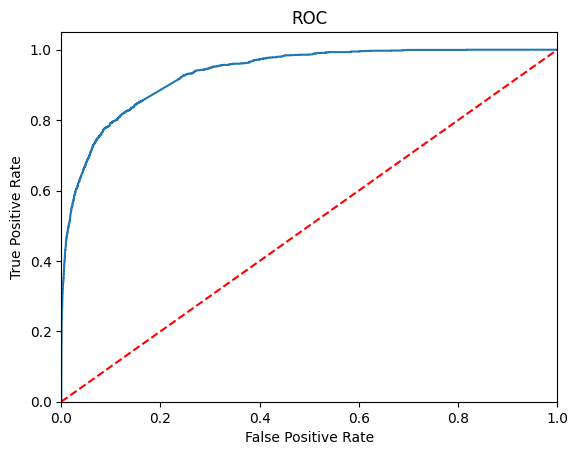

In [32]:
y = train_y
X = x_train_count.astype("float64")

logit_roc_auc = roc_auc_score(y, lgbm_model.predict(X))

fpr, tpr, thresholds = roc_curve(y, lgbm_model.predict_proba(X)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='AUC (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()

### **Estimation Over Test Set**

Look at the first 5 rows of the test set

In [33]:
test_set.head()


,tweet
0,studiolife aislife requires passion dedication...
1,white supremacists want everyone see new â ...
2,safe way heal acne!! altwaystoheal healthy hea...
3,"hp cursed child book reservation already? yes,..."
4,"3rd bihday amazing, hilarious nephew eli ahmir..."


In [34]:
test_set.shape

(17197, 1)

encode values of "tweet" column of test set with "count-vectors" method.

In [35]:
vectorizer = CountVectorizer()
vectorizer.fit(train_x)
test_set = vectorizer.transform(test_set["tweet"])
test_set.toarray()


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [36]:
lgbm_model.predict(test_set.astype("float"))[0:5]


array([0, 1, 0, 0, 0])

In [37]:
train_set

,label,tweet
0,0,father dysfunctional selfish drag kid dysfunc...
1,0,thanks lyft credit can't use cause offer whe...
2,0,bihday majesty
3,0,model love u take u time urð±!!! ððð...
4,0,factsguide: society motivation
...,...,...
31957,0,ate isz youuu?ðððððððð...
31958,0,see nina turner airwave trying wrap mantle gen...
31959,0,listening sad song monday morning otw work sad
31960,1,"sikh temple vandalised calgary, wso condemns act"


In [38]:
test_set

<17197x35460 sparse matrix of type '<class 'numpy.int64'>'
	with 117860 stored elements in Compressed Sparse Row format>

###**Visualization with Word Cloud**

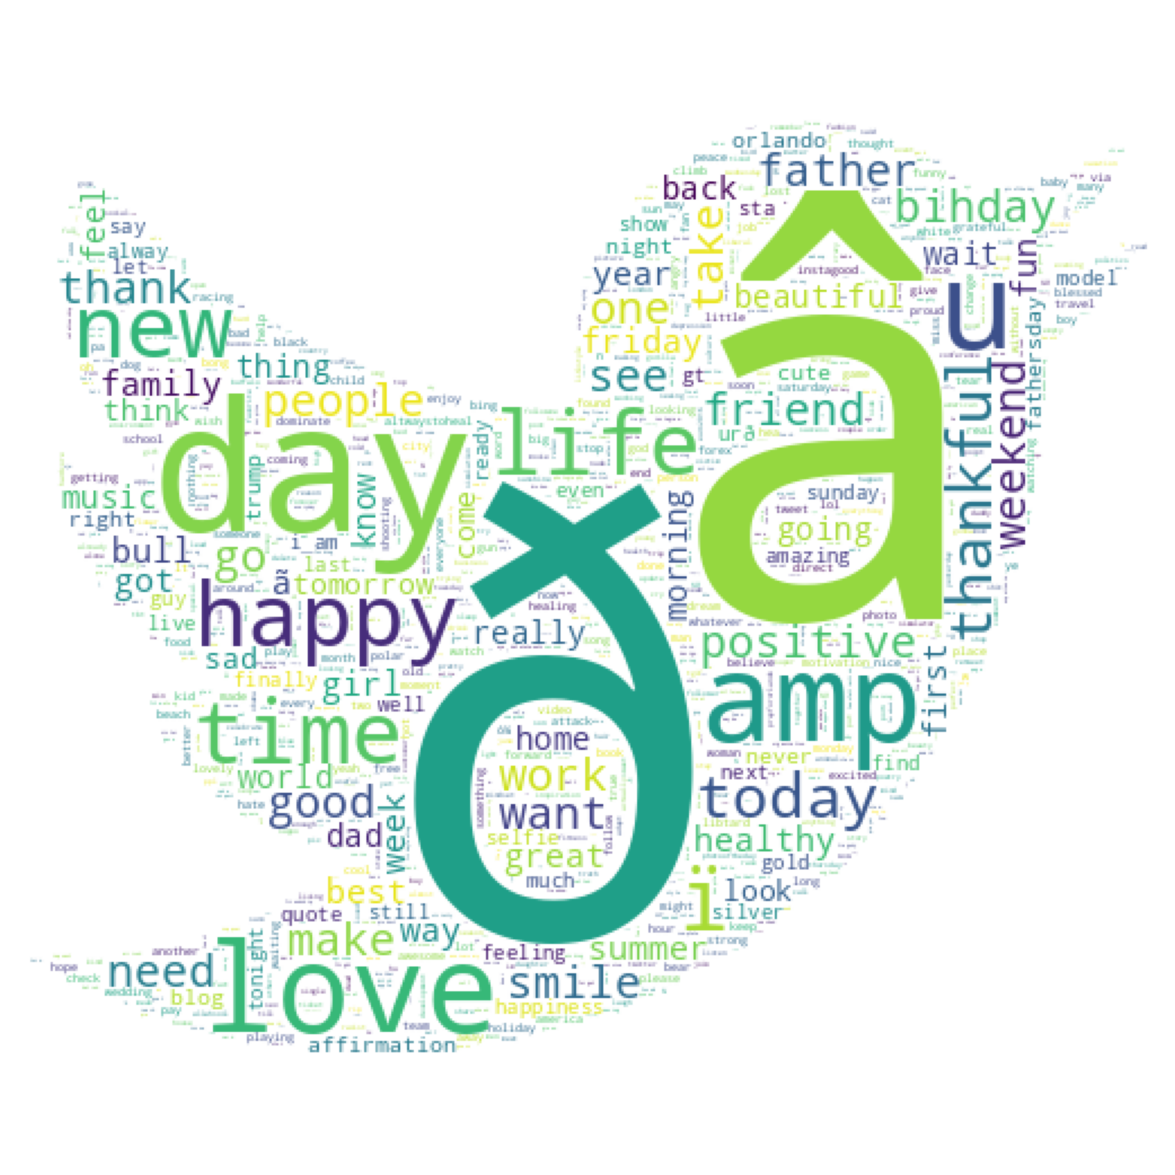

In [39]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image
tw_mask = np.array(Image.open('/content/twitter_mask.jpg'))

text = " ".join(i for i in train_set.tweet)

wc = WordCloud(background_color = "white",
               width = 600, mask = tw_mask,
               height = 600,
               contour_width = 0,
               contour_color = "red",
               max_words = 1000,
               scale = 1,
               collocations = False,
               repeat = True,
               min_font_size = 1)

wc.generate(text)

plt.figure(figsize = [15, 15])
plt.imshow(wc)
plt.axis("off")
plt.show;

In [34]:
train_x, test_x, train_y, test_y = train_x_copy, test_x_copy, train_y_copy, test_y_copy

In [38]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Assuming train_x, test_x, train_y, test_y are defined as in the provided code

# Tokenize the text data
tokenizer = Tokenizer(num_words=5000)  # Adjust num_words as needed
tokenizer.fit_on_texts(train_x)

train_sequences = tokenizer.texts_to_sequences(train_x)
test_sequences = tokenizer.texts_to_sequences(test_x)

# Pad sequences to have the same length
max_sequence_length = 300  # Adjust as needed
train_padded = pad_sequences(train_sequences, maxlen=max_sequence_length, padding='post', truncating='post')
test_padded = pad_sequences(test_sequences, maxlen=max_sequence_length, padding='post', truncating='post')


# Define the RNN model
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(5000, 128, input_length=max_sequence_length),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(train_padded, train_y, epochs=5, validation_data=(test_padded, test_y))  # Adjust epochs as needed

# Evaluate the model
loss, accuracy = model.evaluate(test_padded, test_y)
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy:.4f}')

Epoch 1/5
800/800 ━━━━━━━━━━━━━━━━━━━━ 186s 229ms/step - accuracy: 0.9239 - loss: 0.2637 - val_accuracy: 0.9252 - val_loss: 0.2672
Epoch 2/5
800/800 ━━━━━━━━━━━━━━━━━━━━ 197s 223ms/step - accuracy: 0.9306 - loss: 0.2528 - val_accuracy: 0.9252 - val_loss: 0.2660
Epoch 3/5
800/800 ━━━━━━━━━━━━━━━━━━━━ 199s 220ms/step - accuracy: 0.9315 - loss: 0.2503 - val_accuracy: 0.9252 - val_loss: 0.2662
Epoch 4/5
800/800 ━━━━━━━━━━━━━━━━━━━━ 205s 223ms/step - accuracy: 0.9317 - loss: 0.2497 - val_accuracy: 0.9252 - val_loss: 0.2660
Epoch 5/5
800/800 ━━━━━━━━━━━━━━━━━━━━ 177s 221ms/step - accuracy: 0.9306 - loss: 0.2529 - val_accuracy: 0.9252 - val_loss: 0.2659
200/200 ━━━━━━━━━━━━━━━━━━━━ 11s 56ms/step - accuracy: 0.9212 - loss: 0.2764
Test Loss: 0.2659
Test Accuracy: 0.9252


In [39]:
# Tokenize the text data
tokenizer = Tokenizer(num_words=5000)  # Adjust num_words as needed
tokenizer.fit_on_texts(train_x)

train_sequences = tokenizer.texts_to_sequences(train_x)
test_sequences = tokenizer.texts_to_sequences(test_x)

# Pad sequences to have the same length
max_sequence_length = 300  # Adjust as needed
train_padded = pad_sequences(train_sequences, maxlen=max_sequence_length, padding='post', truncating='post')
test_padded = pad_sequences(test_sequences, maxlen=max_sequence_length, padding='post', truncating='post')

# Define the biLSTM model with at least 4 layers
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(5000, 128, input_length=max_sequence_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)), #First BiLSTM layer
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences=True)), #Second BiLSTM layer
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(16, return_sequences=True)), #Third BiLSTM layer
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(8)), #Fourth BiLSTM layer
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(train_padded, train_y, epochs=5, batch_size=32, validation_data=(test_padded, test_y))  # Adjust epochs and batch_size as needed

# Evaluate the model
loss, accuracy = model.evaluate(test_padded, test_y)
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy:.4f}')

Epoch 1/5
800/800 ━━━━━━━━━━━━━━━━━━━━ 981s 1s/step - accuracy: 0.9233 - loss: 0.2594 - val_accuracy: 0.9498 - val_loss: 0.1462
Epoch 2/5
800/800 ━━━━━━━━━━━━━━━━━━━━ 893s 1s/step - accuracy: 0.9653 - loss: 0.1059 - val_accuracy: 0.9546 - val_loss: 0.1241
Epoch 3/5
800/800 ━━━━━━━━━━━━━━━━━━━━ 901s 1s/step - accuracy: 0.9770 - loss: 0.0688 - val_accuracy: 0.9589 - val_loss: 0.1356
Epoch 4/5
800/800 ━━━━━━━━━━━━━━━━━━━━ 909s 1s/step - accuracy: 0.9865 - loss: 0.0436 - val_accuracy: 0.9571 - val_loss: 0.1572
Epoch 5/5
800/800 ━━━━━━━━━━━━━━━━━━━━ 915s 1s/step - accuracy: 0.9910 - loss: 0.0301 - val_accuracy: 0.9514 - val_loss: 0.1887
200/200 ━━━━━━━━━━━━━━━━━━━━ 52s 258ms/step - accuracy: 0.9499 - loss: 0.1982
Test Loss: 0.1887
Test Accuracy: 0.9514
